In [39]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
movies = pd.read_csv("movies.csv")

In [41]:
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [42]:
movies.shape

(4803, 24)

In [43]:
# we have 4803 movies with 24 feature columns

In [44]:
# selecting only those features that define our recommender system

defining_features = ["genres", "keywords", "tagline", "cast", "director"]

In [45]:
defining_features

['genres', 'keywords', 'tagline', 'cast', 'director']

In [46]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

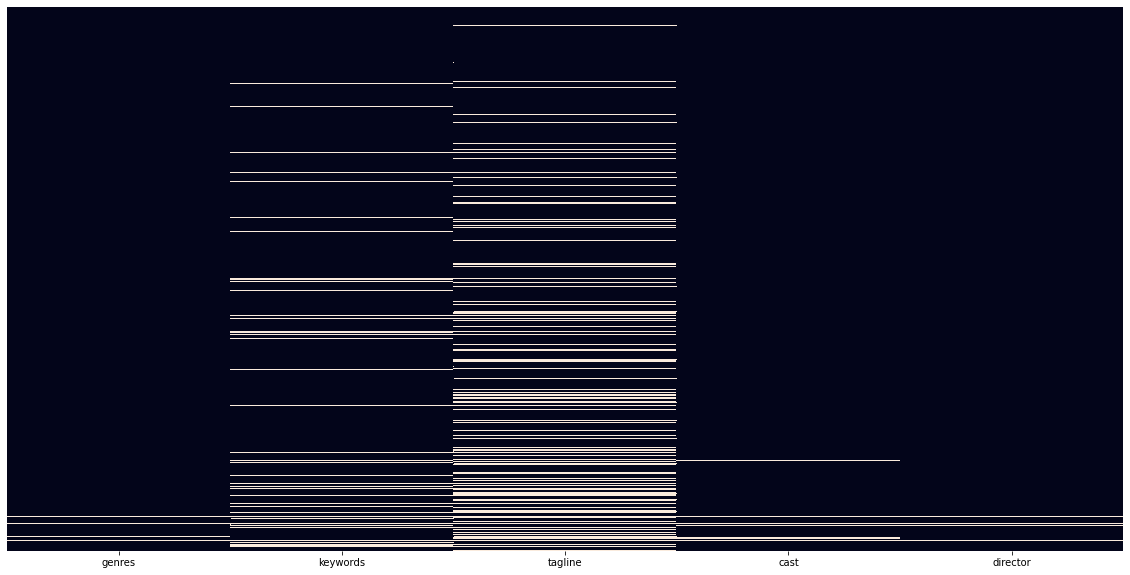

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(movies[defining_features].isna(), cbar=False, yticklabels=False)

In [49]:
# there are null values in few columns that should be taken care of

In [50]:
movies_set = movies[defining_features].fillna('')

<AxesSubplot:>

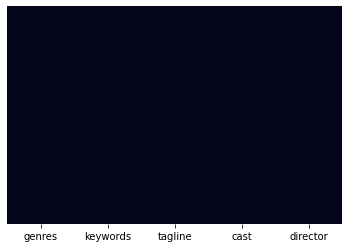

In [51]:
sns.heatmap(movies_set.isna(), cbar=False, yticklabels=False)

In [52]:
# so filling the null values with null string is successful

In [53]:
movies_set

,genres,keywords,tagline,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton
...,...,...,...,...,...
4798,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,"He didn't come looking for trouble, but troubl...",Carlos Gallardo Jaime de Hoyos Peter Marquardt...,Robert Rodriguez
4799,Comedy Romance,,A newlywed couple's honeymoon is upended by th...,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,Edward Burns
4800,Comedy Drama Romance TV Movie,date love at first sight narration investigati...,,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,Scott Smith
4801,,,A New Yorker in Shanghai,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,Daniel Hsia


In [54]:
all_features = ''
for feature in movies_set.columns:
    all_features += movies_set[feature]

In [55]:
all_features

0       Action Adventure Fantasy Science Fictioncultur...
1       Adventure Fantasy Actionocean drug abuse exoti...
2       Action Adventure Crimespy based on novel secre...
3       Action Crime Drama Thrillerdc comics crime fig...
4       Action Adventure Science Fictionbased on novel...
                              ...                        
4798    Action Crime Thrillerunited states\u2013mexico...
4799    Comedy RomanceA newlywed couple's honeymoon is...
4800    Comedy Drama Romance TV Moviedate love at firs...
4801    A New Yorker in ShanghaiDaniel Henney Eliza Co...
4802    Documentaryobsession camcorder crush dream gir...
Name: genres, Length: 4803, dtype: object

In [56]:
# it's time to convert this textual data into numerical data
# because cosine similarity works well with numerical data

In [57]:
vectorizer = TfidfVectorizer()

In [58]:
transformed_features = vectorizer.fit_transform(all_features)

In [59]:
print(transformed_features)

  (0, 3583)	0.16941894714909375
  (0, 20729)	0.2738578969459924
  (0, 16614)	0.15696073877453268
  (0, 14550)	0.2236809363648068
  (0, 23267)	0.16128139780622516
  (0, 26547)	0.19638671147741732
  (0, 22464)	0.20207089568711745
  (0, 21487)	0.21550128478931546
  (0, 27540)	0.19771357974524176
  (0, 27182)	0.23480088356130552
  (0, 21521)	0.1562356665943368
  (0, 18558)	0.2612168335104853
  (0, 18164)	0.08690831799482265
  (0, 27161)	0.1261988657937151
  (0, 24197)	0.07518543993419265
  (0, 22778)	0.2738578969459924
  (0, 4676)	0.2452909770424961
  (0, 26334)	0.13059723071916296
  (0, 22916)	0.33668756406929184
  (0, 10193)	0.16532432420812987
  (0, 4456)	0.21799675215510664
  (0, 9304)	0.2738578969459924
  (0, 21836)	0.09966592997173944
  (0, 8936)	0.11806131645084653
  (0, 444)	0.09109355212252294
  :	:
  (4801, 5449)	0.31510541707008866
  (4801, 22170)	0.31510541707008866
  (4801, 27361)	0.31510541707008866
  (4801, 27513)	0.3005604008026175
  (4801, 8121)	0.2611505149930138
  (4801,

In [60]:
similarity = cosine_similarity(transformed_features)

In [62]:
print(similarity)

[[1.         0.06865296 0.01492221 ... 0.         0.         0.        ]
 [0.06865296 1.         0.02799128 ... 0.01243107 0.         0.        ]
 [0.01492221 0.02799128 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.01243107 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [101]:
user_movie = input("Enter your favourite movie name: ")

Enter your favourite movie name: iron man


In [102]:
close_match = difflib.get_close_matches(user_movie, list(movies['title']))

In [103]:
close_match

['Iron Man', 'Iron Man 3', 'Iron Man 2']

In [104]:
closest_match = close_match[0]

In [105]:
index_of_movie = movies[movies['title']==closest_match]['index'].values[0]

In [106]:
print(index_of_movie)

68


In [107]:
similar_movies = list(enumerate(similarity[index_of_movie]))

In [108]:
print(similar_movies)

[(0, 0.015106149141252807), (1, 0.034008545917263946), (2, 0.005970688419991261), (3, 0.006346189192212358), (4, 0.01480427477891974), (5, 0.005949882865469456), (6, 0.051130903895656), (7, 0.14475303569590786), (8, 0.0), (9, 0.035427843936016785), (10, 0.01745293694932597), (11, 0.005374696360944075), (12, 0.0), (13, 0.005611099160776941), (14, 0.04517825188687174), (15, 0.0), (16, 0.18564323259620552), (17, 0.00569896217764925), (18, 0.014698962737314466), (19, 0.005079920020055092), (20, 0.06806755551861558), (21, 0.005173556735249874), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.1603230693292908), (27, 0.01366486696637728), (28, 0.05629494939086527), (29, 0.0061362061886234085), (30, 0.07040313185709823), (31, 0.22094451191029774), (32, 0.019972034195043942), (33, 0.12555697271128102), (34, 0.0), (35, 0.03187039186963796), (36, 0.02928883361682064), (37, 0.0), (38, 0.1020035754254405), (39, 0.07465498761376428), (40, 0.0), (41, 0.01434399611538337), (42, 0.0), (43, 0.0300002

In [109]:
sorted_similar_movies = sorted(similar_movies, key = lambda x:x[1], reverse=True)

In [110]:
sorted_similar_movies

[(68, 1.0),
 (79, 0.23663084372818138),
 (31, 0.22094451191029774),
 (16, 0.18564323259620552),
 (26, 0.1603230693292908),
 (4401, 0.15455439588528466),
 (7, 0.14475303569590786),
 (33, 0.12555697271128102),
 (46, 0.12091625223248503),
 (511, 0.11447511448088141),
 (203, 0.11302588802563136),
 (3623, 0.11195822443347257),
 (353, 0.11142595449707034),
 (174, 0.10864468060155888),
 (64, 0.10372950313359512),
 (38, 0.1020035754254405),
 (85, 0.10145942826705964),
 (1210, 0.10053490492219067),
 (101, 0.10030515395125751),
 (2235, 0.09948877294015109),
 (954, 0.09853929898816832),
 (788, 0.09321494772760432),
 (3166, 0.09246756760167425),
 (1406, 0.09228343737779446),
 (882, 0.0908411980573617),
 (2186, 0.08751927538174428),
 (2063, 0.08528803891611837),
 (182, 0.08459938579039519),
 (1282, 0.0841272768737229),
 (3443, 0.08399261269675581),
 (307, 0.08396840450529347),
 (356, 0.08013663583472504),
 (205, 0.07913407395905812),
 (2066, 0.07786448224504089),
 (4542, 0.07735936472905562),
 (783

In [111]:
index_list = []
for i in range(30):
    index_list.append(sorted_similar_movies[i][0])

In [112]:
print(index_list)

[68, 79, 31, 16, 26, 4401, 7, 33, 46, 511, 203, 3623, 353, 174, 64, 38, 85, 1210, 101, 2235, 954, 788, 3166, 1406, 882, 2186, 2063, 182, 1282, 3443]


In [113]:
for index in index_list:
    movie_title = movies[movies['index'] == index]['title'].values[0]
    print(movie_title)

Iron Man
Iron Man 2
Iron Man 3
The Avengers
Captain America: Civil War
The Helix... Loaded
Avengers: Age of Ultron
X-Men: The Last Stand
X-Men: Days of Future Past
X-Men
X2
Made
Tropic Thunder
The Incredible Hulk
X-Men: Apocalypse
The Amazing Spider-Man 2
Captain America: The Winter Soldier
Gothika
X-Men: First Class
A Scanner Darkly
The Judge
Deadpool
The Best Man
The Nativity Story
Lucky You
The Kite Runner
Arlington Road
Ant-Man
The Hunting Party
Mallrats
